In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [2]:
pixel_size_cal = 0.503 # obtained from attractor calibration data February2020, but cross checked during Wilson itself

In [3]:
bead_date =20200518
bead_number = 2

In [4]:
# get the attractor 0 position
image_folder = "/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number + "HeightImage/"
images = load_img_files(image_folder+"*")


/data/new_trap/20200518/Bead2/HeightImage/202005201542.bmp 0
/data/new_trap/20200518/Bead2/HeightImage/202005211405.bmp 1
/data/new_trap/20200518/Bead2/HeightImage/202005211537.bmp 2
/data/new_trap/20200518/Bead2/HeightImage/202005211555.bmp 3
/data/new_trap/20200518/Bead2/HeightImage/202005211557.bmp 4
/data/new_trap/20200518/Bead2/HeightImage/202005211558.bmp 5
/data/new_trap/20200518/Bead2/HeightImage/202005211746.bmp 6


462.274058596093
282.5481485261652


<function height_tools.pixel_to_height(pixel, tot=1024, pix_res=4.6, mag=10, calibration=False, pix_size_from_calib=0.5)>

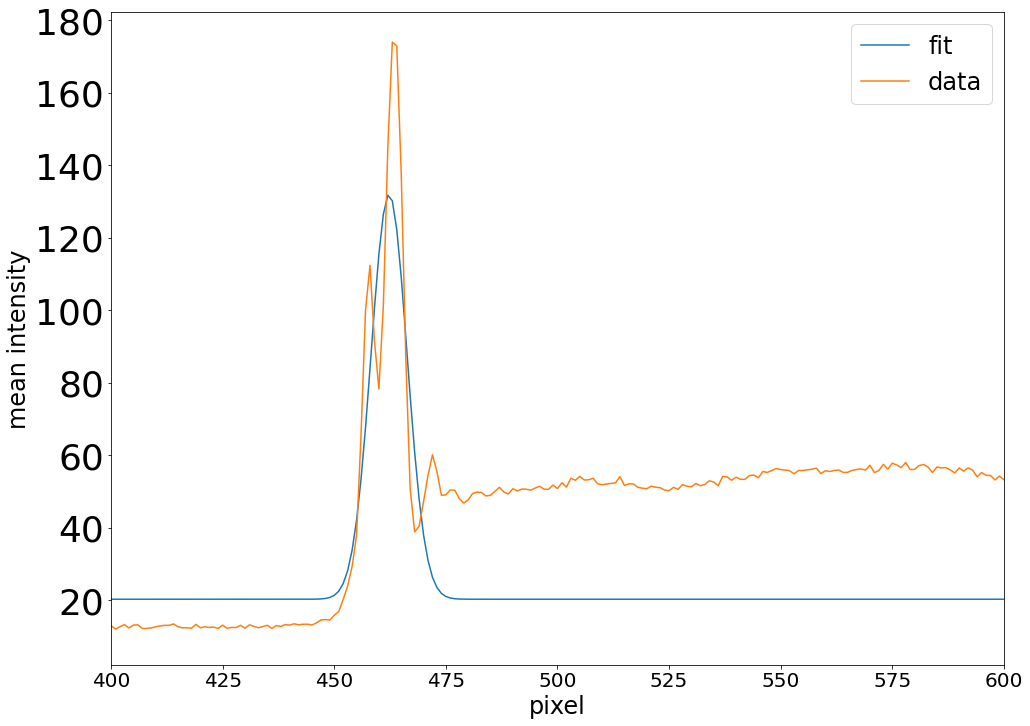

In [5]:
g = get_height_fit(images[5],low_x_lim=350,up_x_lim=450,up_lim_width=21,upper_area=300000,)
plt.xlim(400,600)
print(g[0])
print(pixel_to_height(g[0],tot=1024,pix_res=4.6,mag=10,calibration=True,pix_size_from_calib=pixel_size_cal))
pixel_to_height


In [6]:
image_pos = pixel_to_height(g[0],tot=1024,pix_res=4.6,mag=10,calibration=True,pix_size_from_calib=pixel_size_cal)
aerotech_pos = 42
attractor_0 = image_pos-aerotech_pos # 0 position of attractor as extrapolated from image analysis of z=50 and z=27. Obtained from Wilson attractor screening.
print(attractor_0)

240.54814852616522


In [62]:
# load the image files
dataset = "/Shaking/Shaking375/"
FOI = "Shaking375_7"
filename = "/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset + "Pictures_0/" + FOI
data = load_npy_files(path=filename+"*",max_files=10000)

/data/new_trap/20200518/Bead2//Shaking/Shaking375/Pictures_0/Shaking375_7_0.npy 0
/data/new_trap/20200518/Bead2//Shaking/Shaking375/Pictures_0/Shaking375_7_1.npy 1
/data/new_trap/20200518/Bead2//Shaking/Shaking375/Pictures_0/Shaking375_7_2.npy 2
/data/new_trap/20200518/Bead2//Shaking/Shaking375/Pictures_0/Shaking375_7_3.npy 3
/data/new_trap/20200518/Bead2//Shaking/Shaking375/Pictures_0/Shaking375_7_4.npy 4
/data/new_trap/20200518/Bead2//Shaking/Shaking375/Pictures_0/Shaking375_7_5.npy 5
/data/new_trap/20200518/Bead2//Shaking/Shaking375/Pictures_0/Shaking375_7_6.npy 6
/data/new_trap/20200518/Bead2//Shaking/Shaking375/Pictures_0/Shaking375_7_7.npy 7
/data/new_trap/20200518/Bead2//Shaking/Shaking375/Pictures_0/Shaking375_7_8.npy 8
/data/new_trap/20200518/Bead2//Shaking/Shaking375/Pictures_0/Shaking375_7_9.npy 9
/data/new_trap/20200518/Bead2//Shaking/Shaking375/Pictures_0/Shaking375_7_10.npy 10
/data/new_trap/20200518/Bead2//Shaking/Shaking375/Pictures_0/Shaking375_7_11.npy 11
/data/new_tr

In [63]:
height = [] # get the height using the shadow method
width = []
for i in tqdm(range(len(data))):
    mean, m = from_shadow_image_to_height(data[i],150,area_low_limits=[650,730],area_widths=[45,70],plot=False)
    mean2,m2 = from_shadow_image_to_width(data[i],150,area_low_limits=[650,730],area_width=70,plot=False)
    height.append(pixel_to_height(mean,calibration=True,pix_size_from_calib=pixel_size_cal))
    width.append(mean2)
    #print(mean)
    plt.show()

100%|██████████| 1000/1000 [00:28<00:00, 35.67it/s]


In [64]:
df = pd.DataFrame() # create the dataframe

In [65]:
factor_std = 1.5 # pick the sigma away from the mean used for the correction of outlier
df["height_raw"] = height # just the fit result
df["y_pos_raw"] = width
df["mean_height"] = [x if np.abs(x-np.mean(height))<(factor_std*np.std(height)) else np.mean(height) for x in height] # bring outlier to the mean

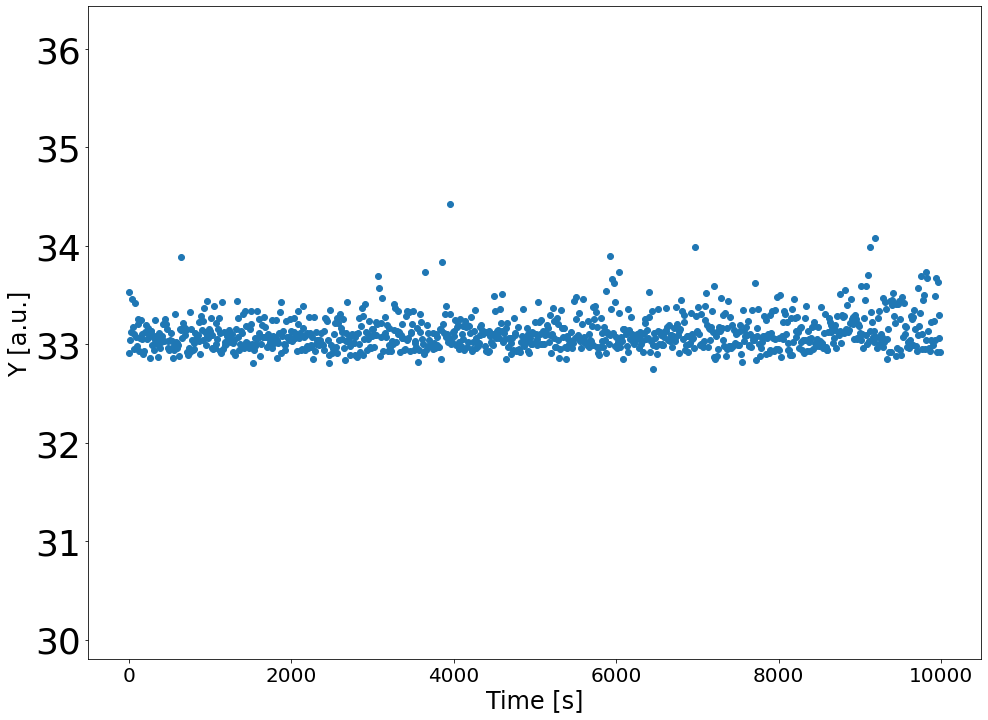

914


In [66]:
plt.plot(np.arange(0,len(width)*10,10),width,linestyle="",marker="o")
plt.xlabel("Time [s]")
plt.ylabel("Y [a.u.]")
plt.ylim(np.mean(width)-1/10*np.mean(width),np.mean(width)+1/10*np.mean(width))
plt.show()
print(len([x for x in width if np.abs(x-np.mean(width))<(factor_std*np.std(width))]))

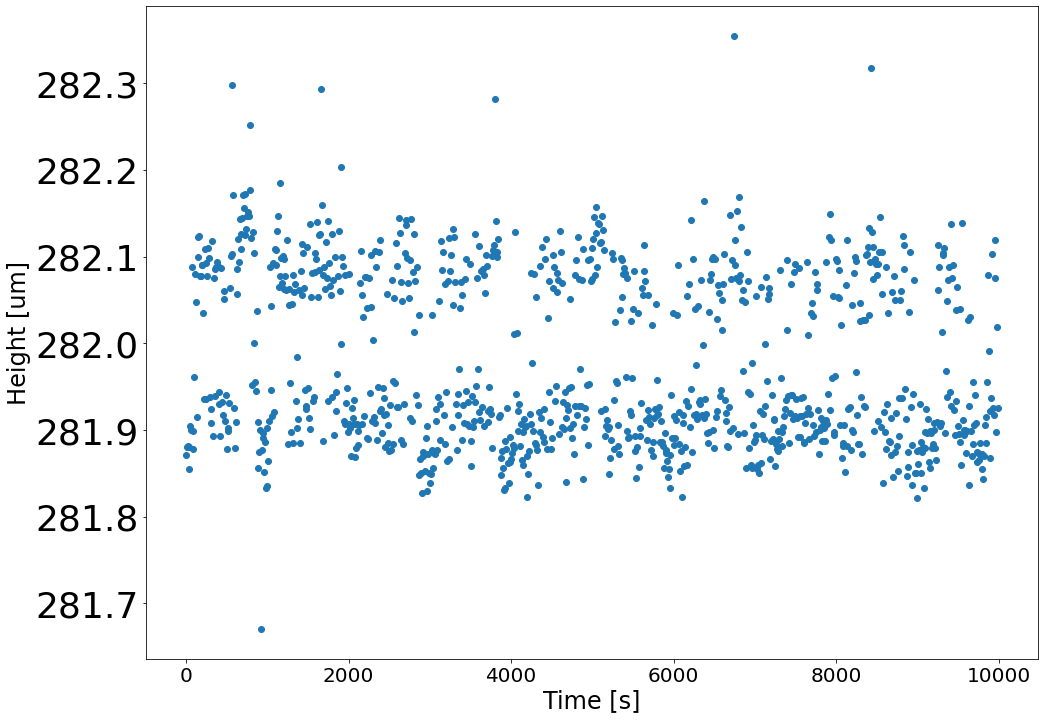

281.9769602506649 0.099156236974183
281.96622246219056 0.08886108980515273
935


In [67]:
plt.plot(np.arange(0,len(height)*10,10),height,linestyle="",marker="o")
plt.xlabel("Time [s]")
plt.ylabel("Height [um]")
plt.show()
print(np.mean(height),np.std(height))
print(np.mean([x for x in height if np.abs(x-np.mean(height))<(factor_std*np.std(height))]),np.std([x for x in height if np.abs(x-np.mean(height))<factor_std*np.std(height)]))
print(len([x for x in height if np.abs(x-np.mean(height))<(factor_std*np.std(height))]))

In [68]:
df['ewm_20'] = df.mean_height.ewm(span=20, adjust=True).mean() # do the exponential weighted mean over 20 files
df['ewm_100'] = df.mean_height.ewm(span=100, adjust=True).mean() # do the exponential weighted mean over 100 files
df['ewm_500'] = df.mean_height.ewm(span=500, adjust=True).mean() # do the exponential weighted mean over 500 files


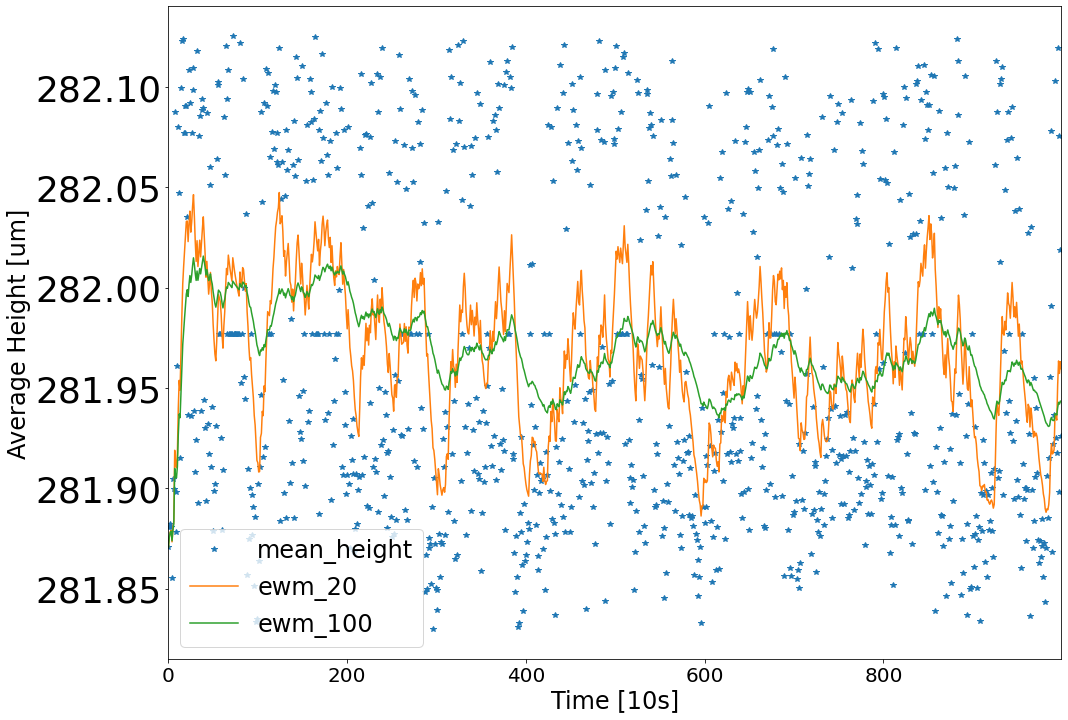

In [69]:
df.mean_height.plot(marker="*",linestyle="")#), label = "height-filtered data")
df.ewm_20.plot()#, label = "20 datasets EWM")
df.ewm_100.plot()#, label = "100 datasets EWM")
plt.xlabel("Time [10s]")
plt.ylabel("Average Height [um]")
plt.legend()
plt.show()

In [70]:
# load the attractor mean position for the data file
data_filename = "/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset
attr_pos = load_dir_reduced_to_attr_pos(dirname=data_filename,file_prefix=FOI,max_files=10000)


100%|██████████| 100/100 [00:04<00:00, 22.38it/s]


In [71]:
# load the time frame from all the data sets in 100er chunks to not flood the memory (could be parallelized)
t = load_dir_reduced_to_time(dirname=data_filename,file_prefix=FOI,max_files=10000)



100%|██████████| 100/100 [00:04<00:00, 24.62it/s]


In [72]:
df["Time_Epoch"] = t # store the time
df["Attr_Pos_V"] = attr_pos # save raw position

del t # free some memory, otherwise bunnies die
del attr_pos # free more memory


------------------------------------------------------------------
| FCN = 2.381E-13               |      Ncalls=35 (35 total)      |
| EDM = 2.38E-13 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.09904999993134567 -0.00499999621661118


/home/analysis_user/New_trap_code/Tools/analysis_tools.py:97: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  print_level=1)
/home/analysis_user/New_trap_code/Tools/analysis_tools.py:97: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  print_level=1)


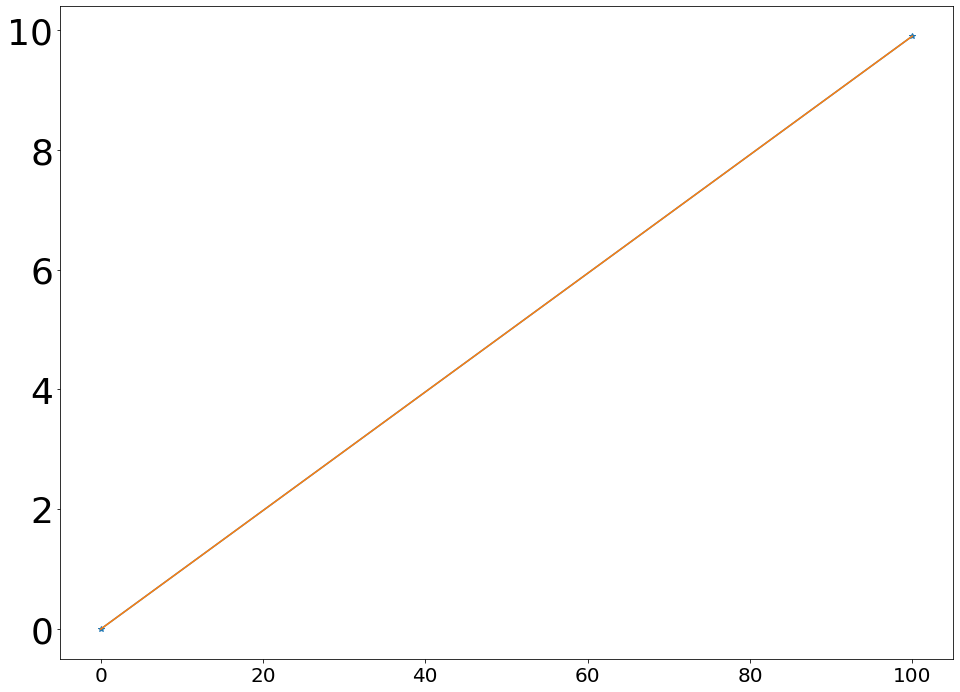

In [73]:
# save three values
## height_cal is the position of the bead in Aerotech coordinates
## z_distance transforms the cant_pos[2] voltage directly into um (using the vanilla calibration)
## z_distance_emp uses Akio's empirical data
df["height_cal"] = df['ewm_100'].apply(lambda element: element-attractor_0)
df["z_distance"] = df['height_cal'] - voltage_to_z_position(df['Attr_Pos_V'])
df["z_distance_emp"] = df['height_cal'] - voltage_to_z_position(df['Attr_Pos_V'],redo=True)


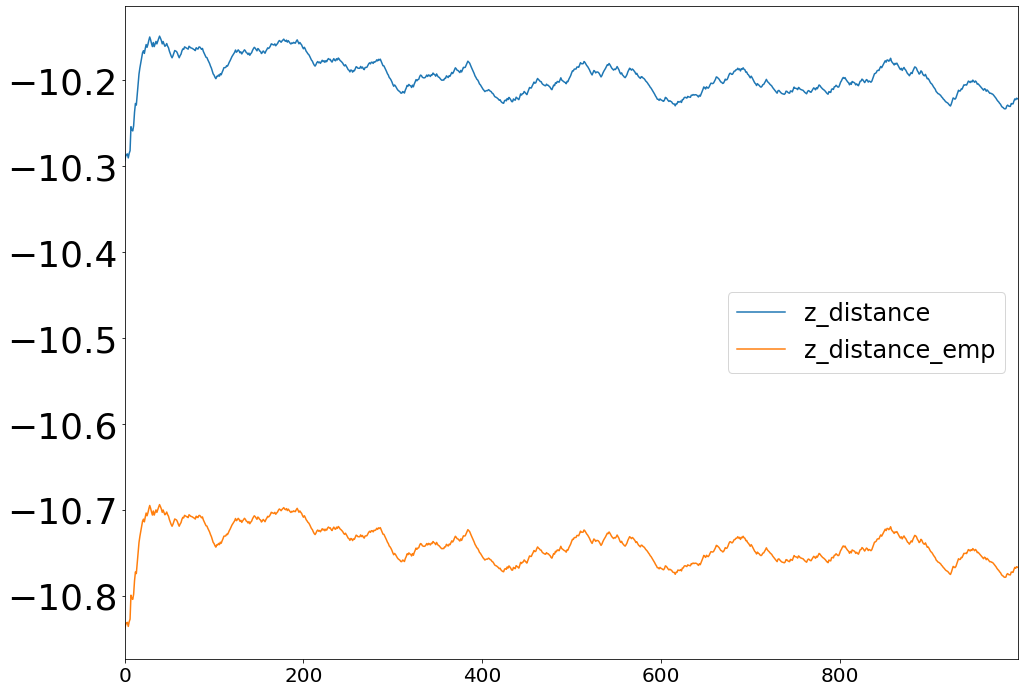

In [74]:
df.z_distance.plot()
df.z_distance_emp.plot()
plt.legend()

In [75]:
# assume for same year and same month, it can have multiple days. get those
dt.datetime.fromtimestamp(df["Time_Epoch"][0])
year = dt.datetime.fromtimestamp(df["Time_Epoch"][0]).year
month = dt.datetime.fromtimestamp(df["Time_Epoch"][0]).month
#months = []
#months = set(months)
days = []
days = set(days)
for i in range(len(df)):
    days.add(dt.datetime.fromtimestamp(df["Time_Epoch"][i]).day)
    #months.add(dt.datetime.fromtimestamp(df["Time_Epoch"][i]).month)
print(days)

{22}


In [76]:
# prepare the files to match the time stamp to extract the environmental data
fn = []
for day in days:
    env_file = "/data/new_trap_processed/processed_files/{0}/Bead{1}/EnvData/{2}{3}{4}/environmental_data_{2}{3}{4}.pkl".format(bead_date,bead_number,year,str(month).zfill(2),str(day).zfill(2))
    fn.append(env_file)
print(fn)
    

['/data/new_trap_processed/processed_files/20200518/Bead2/EnvData/20200522/environmental_data_20200522.pkl']


In [77]:
df_new = match_environmental_data(df,fn) # match the environmental data

100%|██████████| 1000/1000 [00:04<00:00, 207.75it/s]


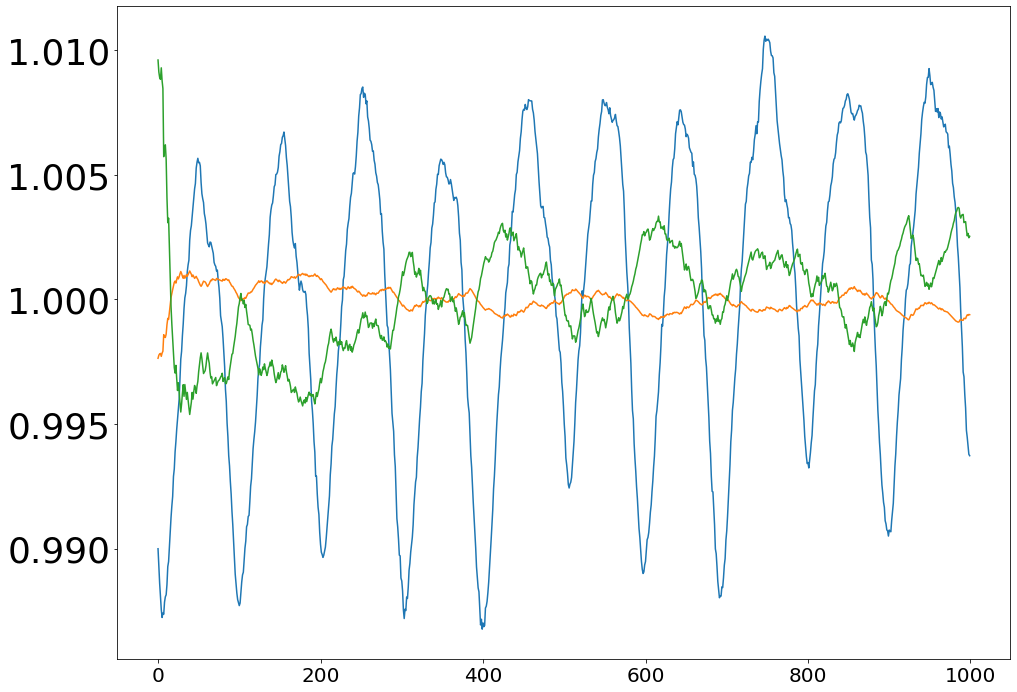

In [78]:
plt.plot(df_new.AirTemperature/df_new.AirTemperature.mean())
plt.plot(df_new.height_cal/df_new.height_cal.mean())
plt.plot(df_new.z_distance/df_new.z_distance.mean())
#plt.plot(df_new.z_distance_emp/df_new.z_distance_emp.mean())
#plt.xlim(0,1000)
plt.show()

In [79]:
df_new

,height_raw,y_pos_raw,mean_height,ewm_20,ewm_100,ewm_500,Time_Epoch,Attr_Pos_V,height_cal,z_distance,z_distance_emp,AirTemperature,SurfaceTemperature,Pressure
0,281.870631,33.535716,281.870631,281.870631,281.870631,281.870631,1.590193e+09,5.161603,41.322483,-10.293546,-10.839081,23.230342,22.996509,1016.234653
1,281.880750,32.907756,281.880750,281.875944,281.875741,281.875701,1.590193e+09,5.161622,41.327593,-10.288632,-10.834169,23.212965,22.996415,1016.238376
2,281.882115,33.048451,281.882115,281.878210,281.877908,281.877847,1.590193e+09,5.161615,41.329760,-10.286391,-10.831927,23.197690,22.996409,1016.283125
3,281.880790,33.129911,281.880790,281.878955,281.878651,281.878588,1.590193e+09,5.161614,41.330502,-10.285634,-10.831170,23.185667,22.996262,1016.240443
4,281.855391,33.462326,281.855391,281.873255,281.873811,281.873911,1.590193e+09,5.161601,41.325662,-10.290345,-10.835879,23.172988,22.996168,1016.263179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,282.119467,32.925835,282.119467,281.951613,281.940130,281.955456,1.590204e+09,5.161612,41.391981,-10.224136,-10.769672,23.341817,22.990232,1016.994668
996,282.075738,33.628368,282.075738,281.963434,281.942815,281.955945,1.590204e+09,5.161628,41.394666,-10.221611,-10.767148,23.335268,22.990284,1016.936073
997,281.898266,33.068685,281.898266,281.957228,281.941933,281.955710,1.590204e+09,5.161638,41.393784,-10.222600,-10.768138,23.327359,22.990426,1016.950141
998,282.018636,33.293961,282.018636,281.963076,281.943452,281.955966,1.590204e+09,5.161612,41.395303,-10.220819,-10.766355,23.319250,22.990589,1016.995524


In [80]:
# save the file
base_proc = "/data/new_trap_processed/processed_files/" + str(bead_date) +  "/Bead%s/" %bead_number

try:
    os.makedirs(base_proc+dataset)
    print("Created subdirs %s" %dataset)
except:
    print("Folder exists or you do not have permissions")
    
outputname = base_proc + dataset+FOI+"_aux.pkl"
if(os.path.isfile(outputname)==False):
    df_new.to_pickle(outputname)
    print("Successfully saved auxiliary file")
else:print("No auxiliary file produced. %s exists already!" %outputname)    

Folder exists or you do not have permissions
Successfully saved auxiliary file


In [81]:
del data # free the data

In [83]:
del df

In [84]:
del df_new